In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [13]:
df = pd.read_csv('C:/Users/mohdz/OneDrive/Desktop/Mini_Project/data/processed/co2_country.csv')
df.head()

,country,year,population,gdp,co2
0,Afghanistan,1950,7480464.0,9.421400e+09,0.084
1,Afghanistan,1951,7571542.0,9.692280e+09,0.092
2,Afghanistan,1952,7667534.0,1.001733e+10,0.092
3,Afghanistan,1953,7764549.0,1.063052e+10,0.106
4,Afghanistan,1954,7864289.0,1.086636e+10,0.106


In [14]:
df.columns

Index(['country', 'year', 'population', 'gdp', 'co2'], dtype='object')

In [15]:
df.count()

country       12960
year          12960
population    12960
gdp           10246
co2           12656
dtype: int64

In [16]:
print(df.country.nunique())
country = df.country.unique()
country

182


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 

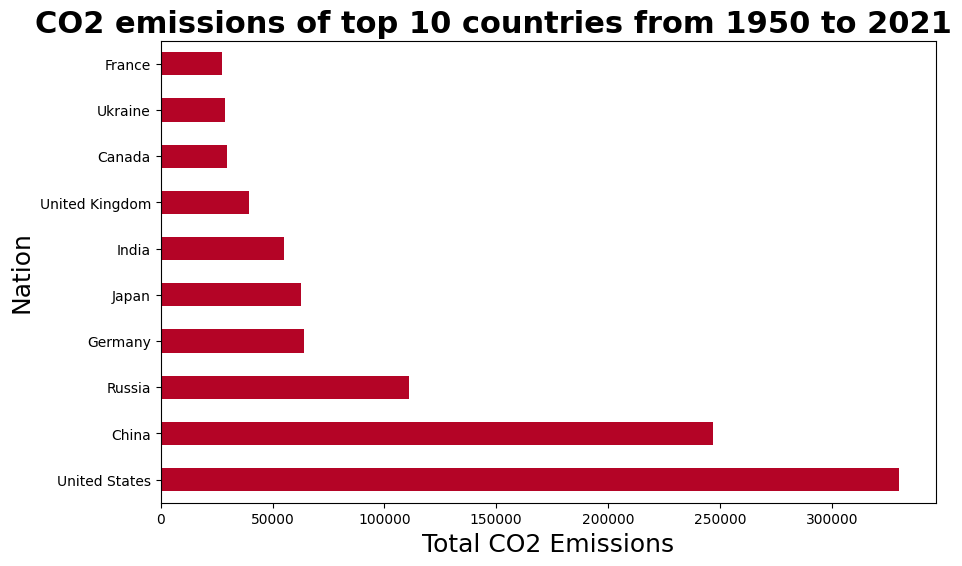

In [17]:
# Top 10 countries of Total CO2 emissions from 1990 to 2019

df_total = df[df.year > 1950].groupby('country').sum()[['co2']]

df_total.sort_values('co2',ascending=False).co2.head(10).plot.barh(cmap = 'coolwarm_r', figsize=(10,6))
 
plt.xlabel("Total CO2 Emissions", fontsize = 18)
plt.ylabel("Nation", fontsize=18)

plt.title("CO2 emissions of top 10 countries from 1950 to 2021", fontsize= 22, fontweight="bold", x=0.43, y=1)
plt.show()

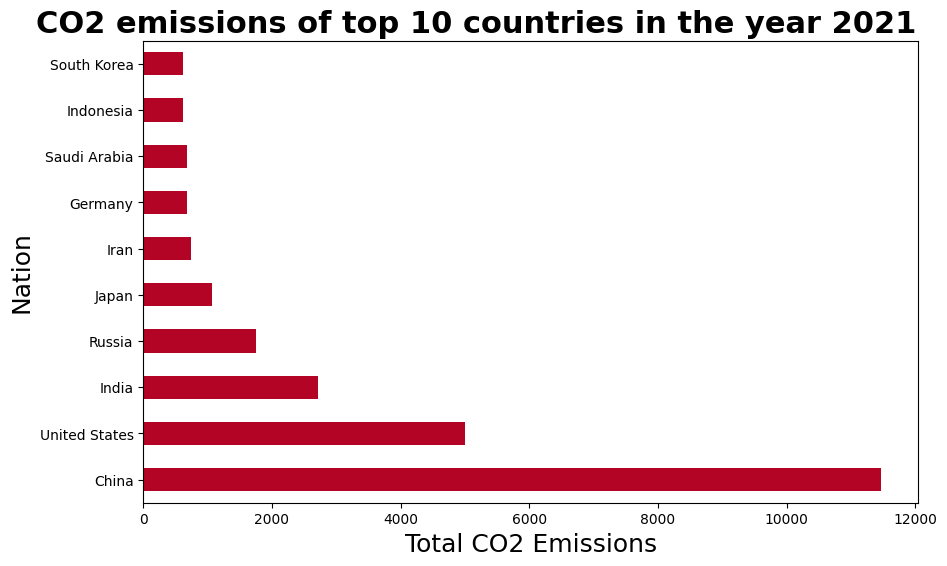

In [18]:
df_total = df[df.year == 2021].groupby('country').sum()[['co2']]
df_total.sort_values('co2',ascending=False).co2.head(10).plot.barh(cmap = 'coolwarm_r', figsize=(10,6))

plt.xlabel("Total CO2 Emissions", fontsize = 18)
plt.ylabel("Nation", fontsize=18)

plt.title("CO2 emissions of top 10 countries in the year 2021", fontsize= 22, fontweight="bold", x=0.43, y=1)
plt.show()

In [19]:
px.choropleth(df[df.year == 2021], locations='country', scope='world',
                    locationmode="country names", color='co2',
             color_continuous_scale='spectral_r')

In [20]:
px.choropleth(df, locations='country',color_continuous_scale='spectral_r',
                    locationmode="country names", color='co2', animation_frame='year')

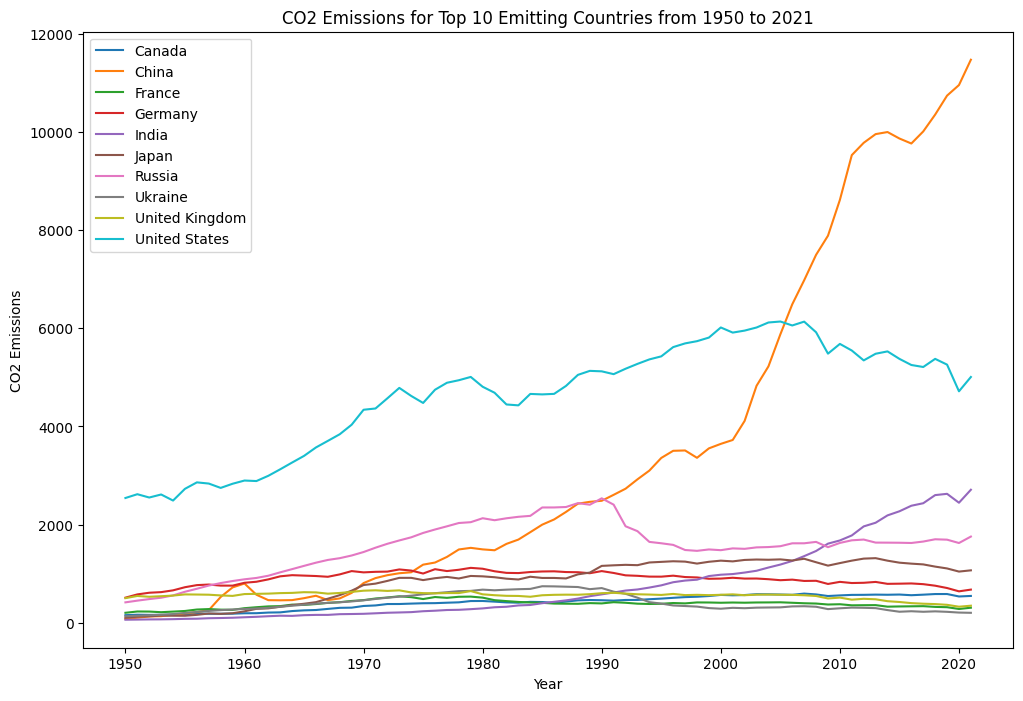

In [22]:
df_total = df.groupby('country').sum()[['co2']]
top_10_countries = df_total.sort_values('co2', ascending=False).head(10).index.tolist()
df_top_10 = df[df['country'].isin(top_10_countries)]


plt.figure(figsize=(12, 8))
for country in df_top_10['country'].unique():
    country_data = df_top_10[df_top_10['country'] == country]
    plt.plot(country_data['year'], country_data['co2'], label=country)


plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions for Top 10 Emitting Countries from 1950 to 2021')


plt.legend()
plt.show()

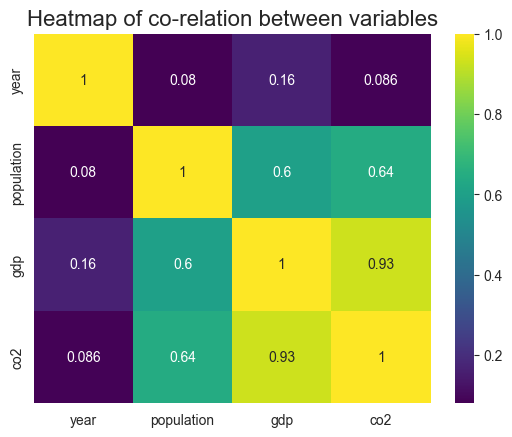

In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()